In [1]:
from utils.notebook_2_utils import * 
import utils.notebook_2_utils as utils

training_df = pd.read_csv("data/training.csv")#.iloc[:1000]
lookup_df = pd.read_csv("data/IdLookupTable.csv")
training_df.fillna(method = 'ffill',inplace = True)

import math


device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [2]:
train_X, train_Y, val_X, val_Y = create_train_test_sets_nchw(training_df, normalize=True)

## Very Simple CNN Model
* Input shape:  64, 1, 96, 96 (nchw)
* Output shape: 64, 30 (nc)


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
# from sklearn.model_selection import train_test_split
import torch.nn.functional as F

### Model Definition

In [4]:
class CNN(nn.Module):
    def __init__(self, input_shape: int, hidden_dim: int, output_dim: int):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=input_shape, out_channels=hidden_dim, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=hidden_dim, out_channels=hidden_dim, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(hidden_dim * 24 * 24, hidden_dim) #this is multiplied by 7*7 because the image is 28*28 and we have 2 conv layers with stride 1 and padding 1
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        x = x.reshape(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

## Control Panel

In [5]:
cnn = CNN(input_shape=1, hidden_dim=64, output_dim=30)

EPOCHS = 40
LEARNING_RATE = .02
BATCH_SIZE = 32


loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(cnn.parameters(), lr=LEARNING_RATE)





### DataLoaders

In [6]:
torch.manual_seed(42)
from torch.utils.data import TensorDataset, DataLoader


# Put data to target device
train_X, train_Y = train_X.to(device), train_Y.to(device)
val_X, val_Y = val_X.to(device), val_Y.to(device)
cnn = cnn.to(device)

train_dataset = TensorDataset(train_X, train_Y)
train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

test_dataset = TensorDataset(val_X, val_Y)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=True)

In [7]:
for X_batch, y_batch in train_dataloader:
    print(X_batch.shape, y_batch.shape)
    break

torch.Size([32, 1, 96, 96]) torch.Size([32, 30])


In [8]:
for X_batch, y_batch in test_dataloader:
    print(X_batch.shape, y_batch.shape)
    break

torch.Size([32, 1, 96, 96]) torch.Size([32, 30])


In [9]:
for idx,batch in enumerate(train_dataloader):
    print("batch input: ", batch[0].size())
    print("batch idx: ",  idx)
    print("batch label: " , batch[1].shape)
    break

print("---------- test dataloader -------")
for idx, (data,target) in enumerate(test_dataloader):
    print(idx, data.shape)
    print(idx, target.shape)
    break

batch input:  torch.Size([32, 1, 96, 96])
batch idx:  0
batch label:  torch.Size([32, 30])
---------- test dataloader -------
0 torch.Size([32, 1, 96, 96])
0 torch.Size([32, 30])


## Learning Rate finder
* use exponentially increasing learning rate, starting at init.

In [10]:
final_lr = 10
init_lr = 1e-10
num_iters = 100

In [11]:
init, final = math.log(init_lr, 10), math.log(final_lr, 10)
init,final

(-10.0, 1.0)

In [12]:
x = np.logspace(init, final, num=100)
x[:5],x[95:]

(array([1.00000000e-10, 1.29154967e-10, 1.66810054e-10, 2.15443469e-10,
        2.78255940e-10]),
 array([ 3.59381366,  4.64158883,  5.9948425 ,  7.74263683, 10.        ]))

In [13]:
for idx, batch in train_dataloader:
    print(idx.shape, batch.shape)

torch.Size([32, 1, 96, 96]) torch.Size([32, 30])
torch.Size([32, 1, 96, 96]) torch.Size([32, 30])
torch.Size([32, 1, 96, 96]) torch.Size([32, 30])
torch.Size([32, 1, 96, 96]) torch.Size([32, 30])
torch.Size([32, 1, 96, 96]) torch.Size([32, 30])
torch.Size([32, 1, 96, 96]) torch.Size([32, 30])
torch.Size([32, 1, 96, 96]) torch.Size([32, 30])
torch.Size([32, 1, 96, 96]) torch.Size([32, 30])
torch.Size([32, 1, 96, 96]) torch.Size([32, 30])
torch.Size([32, 1, 96, 96]) torch.Size([32, 30])
torch.Size([32, 1, 96, 96]) torch.Size([32, 30])
torch.Size([32, 1, 96, 96]) torch.Size([32, 30])
torch.Size([32, 1, 96, 96]) torch.Size([32, 30])
torch.Size([32, 1, 96, 96]) torch.Size([32, 30])
torch.Size([32, 1, 96, 96]) torch.Size([32, 30])
torch.Size([32, 1, 96, 96]) torch.Size([32, 30])
torch.Size([32, 1, 96, 96]) torch.Size([32, 30])
torch.Size([32, 1, 96, 96]) torch.Size([32, 30])
torch.Size([32, 1, 96, 96]) torch.Size([32, 30])
torch.Size([32, 1, 96, 96]) torch.Size([32, 30])
torch.Size([32, 1, 9

In [14]:
for i, (inputs, targets) in enumerate(train_dataloader):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176


In [15]:
n,m = next(iter(train_dataloader))

In [16]:
n.shape, m.shape

(torch.Size([32, 1, 96, 96]), torch.Size([32, 30]))

In [17]:
for i in range (10):
    n,m = next(iter(train_dataloader))
    print(n.shape, m.shape)
    break

torch.Size([32, 1, 96, 96]) torch.Size([32, 30])


In [18]:
for idx,batch in enumerate(train_dataloader):
        print("batch input: ", batch[0].size())
        print("batch idx: ",  idx)
        print("batch label: " , batch[1].shape)
        curr_batch = idx
        break
        

batch input:  torch.Size([32, 1, 96, 96])
batch idx:  0
batch label:  torch.Size([32, 30])


In [19]:
len(train_dataloader)

177

In [20]:
batches = [next(iter(train_dataloader)) for _ in range(len(train_dataloader))]


In [21]:
len(batches)

for i in range(5):
    print(i % 3)



0
1
2
0
1


In [ ]:
import matplotlib.pyplot as plt

def find_lr(model, train_loader, criterion, optimizer, init_lr=1e-8, final_lr=10, num_iters=100):
    """
    Finds the optimal learning rate for the model by gradually increasing the learning rate and plotting the loss.
    Args:
    - model (torch.nn.Module): the PyTorch model to train
    - train_loader (torch.utils.data.DataLoader): the training data loader
    - criterion (torch.nn.Module): the loss function
    - optimizer (torch.optim.Optimizer): the optimizer
    - init_lr (float): the initial learning rate
    - final_lr (float): the final learning rate
    - num_iters (int): the number of iterations to run
    """
    model.train()
    optimizer.param_groups[0]['lr'] = init_lr
    
    init, final = math.log(init_lr, 10), math.log(final_lr, 10)

    
    lr_steps = np.logspace(init, final, num=num_iters+1)
    lr = init_lr
    losses = []
    lrs = []
        
    for i, (inputs, targets) in enumerate(train_loader):
        if i >= num_iters:
            break
        
        optimizer.param_groups[0]['lr'] = lr
        inputs, targets = inputs.cuda(), targets.cuda()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        losses.append(loss.item())
        lrs.append(lr)
        lr = lr_steps[i]
    
    # plot the learning rate vs. loss
    plt.plot(lrs, losses)
    plt.xscale('log')
    plt.xlabel('Learning Rate')
    plt.ylabel('Loss')
    # plt.scatter(losses, lrs)
    plt.show()
    return losses, lrs


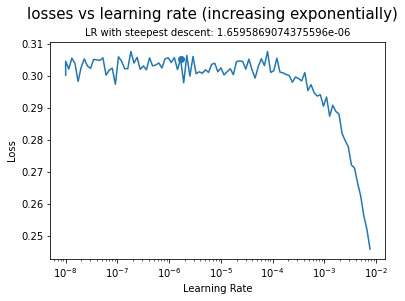

In [23]:
losses, lrs, lrs_dx = find_lr(cnn, train_dataloader, loss_fn, optimizer)

In [24]:
max = np.argmin(lrs_dx)

In [25]:
lrs[max]

1.6595869074375596e-06

In [26]:
lrs_dx

[0.004379332065582275,
 -0.002451390027999878,
 0.0033982396125793457,
 -0.0016366243362426758,
 -0.005655854940414429,
 0.004493653774261475,
 0.0025687217712402344,
 -0.0022052228450775146,
 -0.0007606446743011475,
 0.002788335084915161,
 -0.00011768937110900879,
 -0.00017365813255310059,
 0.0008003413677215576,
 -0.00542333722114563,
 0.0015700459480285645,
 0.0006082355976104736,
 -0.00503087043762207,
 0.008612185716629028,
 -0.0013523101806640625,
 -0.0023692846298217773,
 -1.049041748046875e-05,
 0.005403578281402588,
 -0.0036343932151794434,
 0.00178566575050354,
 -0.0037500858306884766,
 0.0010600388050079346,
 -0.0011943578720092773,
 0.0037350058555603027,
 -0.002539396286010742,
 0.00030535459518432617,
 0.0006153285503387451,
 -0.0015740692615509033,
 0.0028687715530395508,
 0.000340878963470459,
 -0.0014802813529968262,
 0.001528710126876831,
 -0.0037496984004974365,
 0.0033029019832611084,
 -0.007449537515640259,
 0.008588790893554688,
 -0.006494402885437012,
 0.00616717

In [27]:
#  to find steepest point: calculate the derivative, find the min/max)

In [28]:
preds = cnn(X_batch)

In [29]:
y_batch.shape

torch.Size([32, 30])

In [30]:
loss_fn(preds, y_batch)

tensor(0.2441, device='cuda:0', grad_fn=<MseLossBackward0>)

# Gradient Accumilation

## The same training loop but with gradient accumilation added
## __NOTE__: Only run one option
Why: some GPU's may run out of memory, but changing batch size will require varying learning rate and confuse things

In [31]:
# X_blob_train, y_blob_train = train_X, train_Y
# X_blob_test, y_blob_test = val_X, val_Y

for epoch in range(EPOCHS):
    ### Training mode 
    cnn.train()

    
    # Set the number of batches to accumulate gradients over
    accumulation_steps = 4

    # Initialize a counter to keep track of the number of accumulated batches
    accumulation_counter = 0

    # Create an empty tensor to accumulate gradients over the accumulation steps
    grad_acc = {k: torch.zeros_like(v) for k, v in cnn.named_parameters()}

    for X_batch, y_batch in train_dataloader:

        # 1. Forward pass (model outputs raw logits)
        y_logits = cnn(X_batch)

        # 2. Calculate loss/accuracy
        loss = loss_fn(y_logits, y_batch)

        # 3. Loss backwards
        loss.backward()

        # 4. Accumulate gradients over the accumulation steps
        accumulation_counter += 1
        if accumulation_counter == accumulation_steps:
            for param_name, param in cnn.named_parameters():
                grad_acc[param_name] += param.grad / accumulation_steps
            accumulation_counter = 0

        # 5. Optimizer step (only update weights after accumulating gradients over accumulation_steps)
        if accumulation_counter == 0:
            for param_name, param in cnn.named_parameters():
                param.grad = grad_acc[param_name]
            optimizer.step()
            optimizer.zero_grad()

    # Check if there are any remaining accumulated gradients to update
    if accumulation_counter != 0:
        for param_name, param in cnn.named_parameters():
            param.grad = grad_acc[param_name]
        optimizer.step()
        optimizer.zero_grad()

    
    
    cnn.eval()
    with torch.inference_mode():
        for X_batch, y_batch in test_dataloader:
            test_logits = cnn(X_batch)
            test_loss = loss_fn(test_logits, y_batch)
            
            
    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test Loss: {test_loss:.5f}")

Epoch: 0 | Loss: 0.00388 | Test Loss: 0.00178
Epoch: 10 | Loss: 0.00066 | Test Loss: 0.00015
Epoch: 20 | Loss: 0.00114 | Test Loss: 0.00049
Epoch: 30 | Loss: 0.00102 | Test Loss: 0.00049


## Predictions


In [32]:
preds = cnn(val_X.to(device))

RuntimeError: CUDA out of memory. Tried to allocate 3.10 GiB (GPU 0; 7.80 GiB total capacity; 3.93 GiB already allocated; 2.76 GiB free; 4.00 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [ ]:
preds.shape

In [ ]:
val_Y.shape

In [ ]:
loss_fn(preds, val_Y)

In [ ]:
val_X.shape, preds.shape, val_Y.shape

In [ ]:
preds[0][1]

In [ ]:
val_X[1].shape, val_X[1][0].shape

In [ ]:
def show_pred(X, preds, actual, index, point):
    plt.imshow(X[index][0],cmap='gray')

    plt.scatter(96* preds[index][point],96* preds[index][point + 1] ,c='r', marker='s', s=60, alpha=.5)
    plt.scatter(96*actual[index][point],96* actual[index][point+1],c='g', marker='s', s=60, alpha=.5)

    plt.legend(['predicted','actual'])
    


In [ ]:
show_pred(val_X.to("cpu"), preds.to("cpu").detach().numpy(), val_Y.to("cpu").detach().numpy(), 0, 0)

In [ ]:
preds[0][0], preds[0][1]

In [ ]:
val_Y[0][0], val_Y[0][1]

In [ ]:
val_X[0][0]